# Chapter 3 Classification

learn to build a classifier using sklearn and evaluate the performance

## fetch dataset MNIST

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# fetch mnist from keras.datasets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [8]:
# save as local file
np.savez('./datasets/mnist.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)



In [9]:
# load data from local file
mnist_dat = np.load('./datasets/mnist.npz')

In [14]:
x_train = mnist_dat['x_train']
y_train = mnist_dat['y_train']

x_test = mnist_dat['x_test']
y_test = mnist_dat['y_test']

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

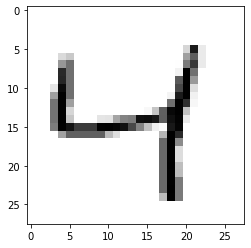

In [17]:
plt.imshow(x_train[2], cmap='Greys')

In [18]:
y_train[2]

4

In [19]:
28*28

784

In [30]:
x_test.shape

(10000, 28, 28)

In [31]:
x_train_prep = x_train.reshape(60000, 784)
x_test_prep = x_test.reshape(10000, 784)

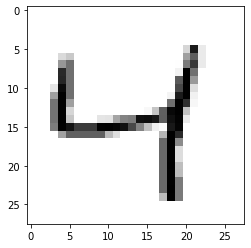

In [27]:
x2 = x_train_reshaped[2].reshape(28, 28)
plt.imshow(x2, cmap='Greys')

## Train a model

In [33]:
# review the data 
x_train_prep.shape, y_train.shape

((60000, 784), (60000,))

In [34]:
x_test_prep.shape, y_test.shape

((10000, 784), (10000,))

### first simplify the problem and only try to identify one digit, 5

In [35]:
from sklearn.linear_model import SGDClassifier


In [36]:
y_train_5 = (y_train==5) # True for all 5s, False for all others
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_prep, y_train_5)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Now we can use our model to predict some digit

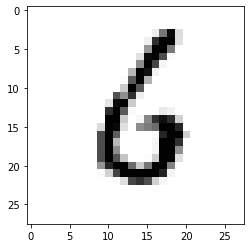

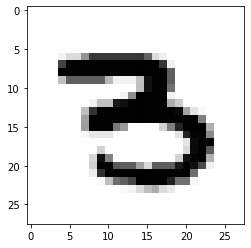

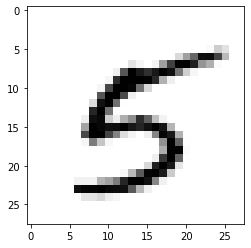

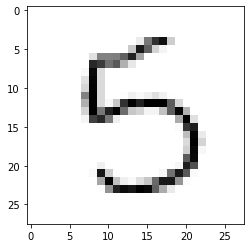

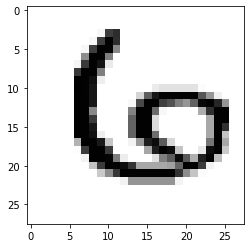

In [56]:
some_digit = x_test_prep[50:55] # a array contain some digits

#  check the digit
for di in some_digit:
    
    plt.imshow(di.reshape(28, 28), cmap='Greys')
    plt.show()

In [57]:
# predict use our model
sgd_clf.predict(some_digit)

array([False, False,  True,  True, False])

### Performance measurement
#### Measure Accuracy Using Cross-Validation

In [59]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train_prep, y_train_5, cv=3, scoring="accuracy")




array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix

\begin{align}
TN & & FP \\
FN & &TP 
\end{align}

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, x_train_prep, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

#### Precision and Recall

\begin{align}
precision = \frac{TP}{TP + FP}\\
recall = \frac{TP}{TP + FN}
\end{align}


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

recall_score(y_train_5, y_train_pred)

f1_score(y_train_5, y_train_pred)

0.7325171197343846

##### Precision/Recall Tradeoff

In [64]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, x_train_prep, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)



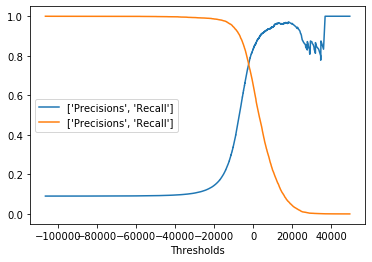

In [69]:
plt.plot(thresholds, precisions[:-1], thresholds, recalls[:-1], label=["Precisions","Recall"])
plt.xlabel("Thresholds")
plt.legend()